In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd
import numpy as np

In [130]:
df=pd.read_csv('/The Mummy\'s Tomb Cost Dataset.csv')
df

,gold,age,iron,silver,inEgypt,isAKing,real_price,black_market_price
0,33,6238,865,522,1,1,7494.50,39941442
1,75,5044,922,1847,1,1,14412.00,29716054
2,76,6930,894,2085,1,1,15999.50,53184137
3,35,6304,757,119,0,1,5092.00,40333851
4,97,5950,536,783,0,0,7980.50,36312294
...,...,...,...,...,...,...,...,...
993,37,5849,836,2801,1,1,18745.25,42763667
994,83,5306,544,2500,1,1,16688.50,34713461
995,29,6272,839,2314,0,0,15945.00,45397342
996,44,6457,817,1462,1,0,11915.25,44501718


In [131]:
x1s=df['gold'].to_numpy()
x2s=df['age'].to_numpy()
x3s=df['iron'].to_numpy()
x4s=df['silver'].to_numpy()
x5s=df['inEgypt'].to_numpy()
x6s=df['isAKing'].to_numpy()

x1s.shape

(998,)

In [132]:
x1s=x1s.reshape(x1s.shape[0],1)
x2s=x2s.reshape(x2s.shape[0],1)
x3s=x3s.reshape(x3s.shape[0],1)
x4s=x4s.reshape(x4s.shape[0],1)
x5s=x5s.reshape(x5s.shape[0],1)
x6s=x6s.reshape(x6s.shape[0],1)

In [133]:
x1s.shape

(998, 1)

In [134]:
x=np.concatenate((x1s,x2s,x3s,x4s,x5s,x6s),axis=1)

In [135]:
x.shape

(998, 6)

In [136]:
y=df['black_market_price']
y

0      39941442
1      29716054
2      53184137
3      40333851
4      36312294
         ...   
993    42763667
994    34713461
995    45397342
996    44501718
997    40240622
Name: black_market_price, Length: 998, dtype: int64

In [137]:
import sklearn
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=0.20, random_state=42)

In [138]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(798, 6)
(798,)
(200, 6)
(200,)


In [139]:
# importing the classes for building the neural network layers
from tensorflow.keras.layers import Dense,Input,Concatenate
import tensorflow as tf

In [140]:
initialiezer=tf.keras.initializers.RandomUniform(minval=0.0005, maxval=1, seed=100)

input= Input(shape=6,name="input_57") # can take 6 inputs at a time

# this technique is called functional API
x=Dense(units=1,use_bias=True,activation='relu',kernel_initializer=initialiezer,name="dense_8")(input)  # new dense layer created connected to input layer

In [141]:
from tensorflow.keras.models import Model

In [142]:
model=Model([input],[x]) 

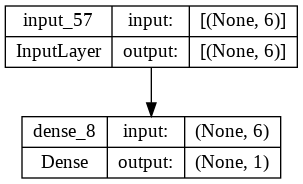

In [143]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [144]:
# configure the training
model.compile(loss='mse',metrics=['mse'],optimizer=tf.optimizers.Adam(learning_rate=0.005))

In [145]:
# train the model. just run a few epochs for this test run. you can adjust later.
history=model.fit(xTrain,yTrain,validation_data=(xTest,yTest),batch_size=128, epochs=20)

Epoch 1/20
7/7 [==============================] - 1s 28ms/step - loss: 1662951073251328.0000 - mse: 1662951073251328.0000 - val_loss: 1608463641739264.0000 - val_mse: 1608463641739264.0000
Epoch 2/20
7/7 [==============================] - 0s 7ms/step - loss: 1662927450931200.0000 - mse: 1662927450931200.0000 - val_loss: 1608440287854592.0000 - val_mse: 1608440287854592.0000
Epoch 3/20
7/7 [==============================] - 0s 9ms/step - loss: 1662903828611072.0000 - mse: 1662903828611072.0000 - val_loss: 1608416933969920.0000 - val_mse: 1608416933969920.0000
Epoch 4/20
7/7 [==============================] - 0s 10ms/step - loss: 1662879937855488.0000 - mse: 1662879937855488.0000 - val_loss: 1608393445867520.0000 - val_mse: 1608393445867520.0000
Epoch 5/20
7/7 [==============================] - 0s 6ms/step - loss: 1662856315535360.0000 - mse: 1662856315535360.0000 - val_loss: 1608370091982848.0000 - val_mse: 1608370091982848.0000
Epoch 6/20
7/7 [==============================] - 0s 6ms/s

In [146]:
input=xTest[60].reshape(1,6)
ypred=model.predict(input)
ypred

1/1 [==============================] - 0s 80ms/step


array([[10970.684]], dtype=float32)

In [147]:
yTest[60]

29993914

In [148]:
x1s=df['gold'].to_numpy()
x2s=df['age'].to_numpy()
x3s=df['iron'].to_numpy()

x1s.shape

(998,)

In [149]:
x1s=x1s.reshape(x1s.shape[0],1)
x2s=x2s.reshape(x2s.shape[0],1)
x3s=x3s.reshape(x3s.shape[0],1)

x1s.shape

(998, 1)

In [150]:
x=np.concatenate((x1s,x2s,x3s),axis=1)
x.shape

(998, 3)

In [151]:
y=df['real_price']
y

0       7494.50
1      14412.00
2      15999.50
3       5092.00
4       7980.50
         ...   
993    18745.25
994    16688.50
995    15945.00
996    11915.25
997    14105.50
Name: real_price, Length: 998, dtype: float64

In [152]:
import sklearn
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=0.20, random_state=42)

In [153]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(798, 3)
(798,)
(200, 3)
(200,)


In [154]:
initialiezer=tf.keras.initializers.RandomUniform(minval=0.0005, maxval=1, seed=100)

input= Input(shape=3,name="input_57") # can take 6 inputs at a time

# this technique is called functional API
x=Dense(units=1,use_bias=True,activation='relu',kernel_initializer=initialiezer,name="dense_8")(input)  # new dense layer created connected to input layer

In [155]:
model=Model([input],[x]) 

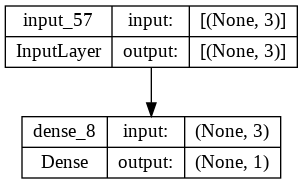

In [156]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [157]:
# configure the training
model.compile(loss='mse',metrics=['mse'],optimizer=tf.optimizers.Adam(learning_rate=0.005))

In [158]:
# train the model. just run a few epochs for this test run. you can adjust later.
history=model.fit(xTrain,yTrain,validation_data=(xTest,yTest),batch_size=128, epochs=20)

Epoch 1/20
7/7 [==============================] - 0s 24ms/step - loss: 104797528.0000 - mse: 104797528.0000 - val_loss: 112179504.0000 - val_mse: 112179504.0000
Epoch 2/20
7/7 [==============================] - 0s 8ms/step - loss: 100425328.0000 - mse: 100425328.0000 - val_loss: 107714736.0000 - val_mse: 107714736.0000
Epoch 3/20
7/7 [==============================] - 0s 7ms/step - loss: 96176872.0000 - mse: 96176872.0000 - val_loss: 103391256.0000 - val_mse: 103391256.0000
Epoch 4/20
7/7 [==============================] - 0s 7ms/step - loss: 92074240.0000 - mse: 92074240.0000 - val_loss: 99214744.0000 - val_mse: 99214744.0000
Epoch 5/20
7/7 [==============================] - 0s 7ms/step - loss: 88145488.0000 - mse: 88145488.0000 - val_loss: 95189976.0000 - val_mse: 95189976.0000
Epoch 6/20
7/7 [==============================] - 0s 6ms/step - loss: 84323552.0000 - mse: 84323552.0000 - val_loss: 91342840.0000 - val_mse: 91342840.0000
Epoch 7/20
7/7 [==============================] - 0s 

In [160]:
input=xTest[60].reshape(1,3)
ypred=model.predict(input)
ypred

1/1 [==============================] - 0s 94ms/step


array([[7114.9624]], dtype=float32)

In [161]:
yTest[60]

9802.5

In [162]:
# Getting the data out as numpy arrays
x1s=df['gold'].to_numpy()
x2s=df['age'].to_numpy()
x3s=df['iron'].to_numpy()
x4s=df['silver'].to_numpy()
x5s=df['inEgypt'].to_numpy()
x6s=df['isAKing'].to_numpy()

In [163]:
print(x1s.shape)
print(x2s.shape)
print(x3s.shape)
print(x4s.shape)
print(x5s.shape)
print(x6s.shape)

(998,)
(998,)
(998,)
(998,)
(998,)
(998,)


In [164]:
x1s=x1s.reshape(x1s.shape[0],1)
x2s=x2s.reshape(x2s.shape[0],1)
x3s=x3s.reshape(x3s.shape[0],1)
x4s=x4s.reshape(x4s.shape[0],1)
x5s=x5s.reshape(x5s.shape[0],1)
x6s=x6s.reshape(x6s.shape[0],1)

In [165]:
print(x1s.shape)
print(x2s.shape)
print(x3s.shape)
print(x4s.shape)
print(x5s.shape)
print(x6s.shape)

(998, 1)
(998, 1)
(998, 1)
(998, 1)
(998, 1)
(998, 1)


In [166]:
x=np.concatenate((x1s,x2s,x3s,x4s,x5s,x6s),axis=1)
x.shape

(998, 6)

In [167]:
y1s=df['real_price'].to_numpy()
y2s=df['black_market_price'].to_numpy()

In [168]:
print(y1s.shape)
print(y2s.shape)

(998,)
(998,)


In [169]:
y1s=y1s.reshape(y1s.shape[0],1)
y2s=y2s.reshape(y2s.shape[0],1)
ys=np.concatenate((y1s,y2s),axis=1)

In [170]:
print(y1s.shape)
print(y2s.shape)
print(ys.shape)

(998, 1)
(998, 1)
(998, 2)


In [171]:
initialiezer=tf.keras.initializers.RandomUniform(minval=0.0005, maxval=1, seed=100)

input1= Input(shape=1)
input2= Input(shape=1)
input3= Input(shape=1)
input4= Input(shape=1)
input5= Input(shape=1)
input6= Input(shape=1)


l1=Dense(units=5,use_bias=True,activation='relu',kernel_initializer=initialiezer)(input1)
l2=Dense(units=5,use_bias=True,activation='relu',kernel_initializer=initialiezer)(input2)
l3=Dense(units=5,use_bias=True,activation='relu',kernel_initializer=initialiezer)(input3)
l4=Dense(units=5,use_bias=True,activation='relu',kernel_initializer=initialiezer)(input4)
l5=Dense(units=5,use_bias=True,activation='relu',kernel_initializer=initialiezer)(input5)
l6=Dense(units=5,use_bias=True,activation='relu',kernel_initializer=initialiezer)(input6)




concatted1 = Concatenate()([l1, l2, l3])
concatted2 = Concatenate()([l4, l5, l6])

denseCombined1=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(concatted1) 
denseCombined2=Dense(units=10,use_bias=True,activation='relu',kernel_initializer=initialiezer)(concatted2) 

concatted3 = Concatenate()([denseCombined1,denseCombined2])

denseFinal1=Dense(units=8,use_bias=True,activation='relu',kernel_initializer=initialiezer)(concatted3) 
denseFinal2=Dense(units=2,use_bias=True,activation='relu',kernel_initializer=initialiezer)(denseFinal1) 


In [172]:
import sklearn
from sklearn.model_selection import train_test_split
x1Train, x1Test, x2Train, x2Test,x3Train, x3Test, x4Train, x4Test,x5Train, x5Test, x6Train, x6Test, y1Train, y1Test = train_test_split(x1s,x2s,x3s,x4s,x5s,x6s,ys, test_size=0.20, random_state=42)

In [173]:
model=Model([input1,input2,input3,input4,input5,input6],[denseFinal2]) 

In [174]:
# configure the training
model.compile(loss='mse',metrics=['mse'],optimizer=tf.optimizers.Adam(learning_rate=0.005))

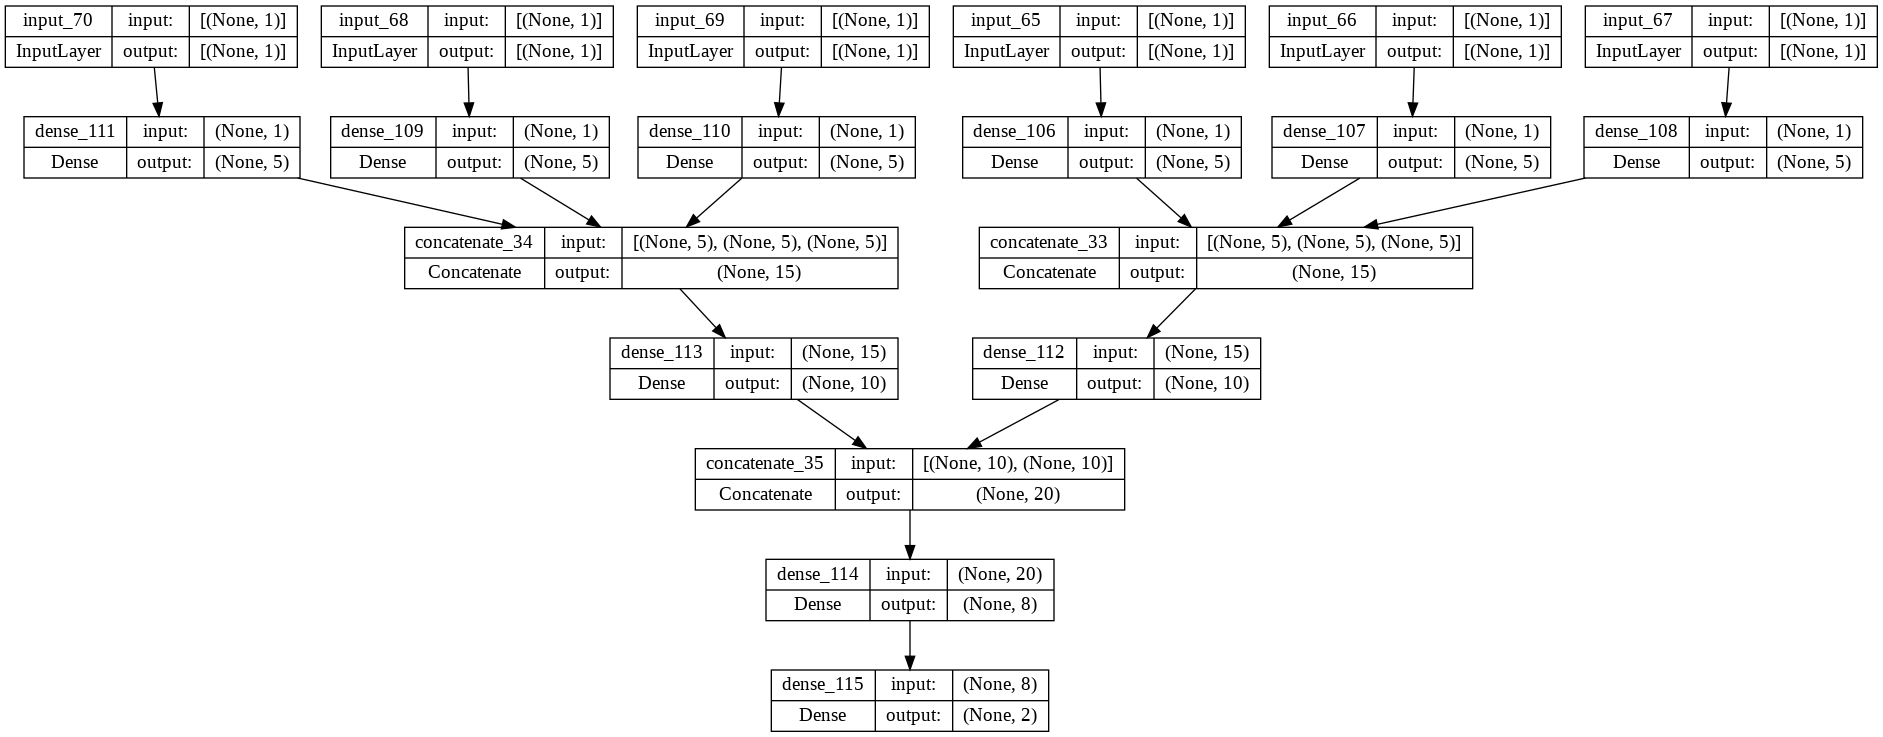

In [175]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [176]:
history=model.fit(x=[x1Train,x2Train,x3Train,x4Train,x5Train,x6Train],y=[y1Train],validation_data=([x1Test,x2Test,x3Test,x4Test,x5Test,x6Test],[y1Test]),batch_size=64, epochs=30)


Epoch 1/30
13/13 [==============================] - 1s 23ms/step - loss: 824362735239168.0000 - mse: 824362735239168.0000 - val_loss: 794718401200128.0000 - val_mse: 794718401200128.0000
Epoch 2/30
13/13 [==============================] - 0s 6ms/step - loss: 819377955930112.0000 - mse: 819377955930112.0000 - val_loss: 788298633052160.0000 - val_mse: 788298633052160.0000
Epoch 3/30
13/13 [==============================] - 0s 5ms/step - loss: 811365023350784.0000 - mse: 811365023350784.0000 - val_loss: 778041714278400.0000 - val_mse: 778041714278400.0000
Epoch 4/30
13/13 [==============================] - 0s 6ms/step - loss: 798630780862464.0000 - mse: 798630780862464.0000 - val_loss: 761740971212800.0000 - val_mse: 761740971212800.0000
Epoch 5/30
13/13 [==============================] - 0s 6ms/step - loss: 778468258217984.0000 - mse: 778468258217984.0000 - val_loss: 736552464416768.0000 - val_mse: 736552464416768.0000
Epoch 6/30
13/13 [==============================] - 0s 5ms/step - los

In [177]:
input=[x1Test[60],x2Test[60],x3Test[60],x4Test[60],x5Test[60],x6Test[60]]
output=model.predict(input)
output

1/1 [==============================] - 0s 345ms/step


array([[       0., 43348332.]], dtype=float32)

In [180]:
y1Test[60]

array([1.2656500e+04, 4.6468514e+07])